In [1]:
import numpy as np 
from tslearn.datasets import UCR_UEA_datasets

# Parameters

In [2]:
dataset='ElectricDevices'

In [3]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)

In [4]:
print(train_x.shape)
print(test_x.shape)

(8926, 96, 1)
(7711, 96, 1)


In [5]:
train_x.shape

(8926, 96, 1)

In [6]:
train_y.shape

(8926,)

# Load Model

In [7]:

import tensorflow as tf 
model_to_explain = tf.keras.models.load_model(f'../../ClassificationModels/models/{dataset}/cnn/best_model.hdf5')

2022-06-15 14:42:27.361381: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-15 14:42:27.361396: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-15 14:42:28.346382: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-15 14:42:28.347218: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-15 14:42:28.347402: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.s

# Explanation Algo

In [8]:
explained_instance = train_x[0]
nb_interpretable_feature = 10
explanation_size = 5
nb_neighbors = 1000
learning_process_name = 'Lime'
transform_name = 'straight_line'

In [9]:
from TSInterpret.InterpretabilityModels.leftist.leftist import LEFTIST
from TSInterpret.InterpretabilityModels.leftist.timeseries.segmentator.uniform_segmentator import UniformSegmentator

In [10]:
segmentator = UniformSegmentator(nb_interpretable_feature)
leftist = LEFTIST(model_to_explain,(test_x, test_y),mode='time',backend='TF')
#,'straight_line',segmentator,,learning_process_name

In [11]:
explanations = leftist.explain(np.array(explained_instance),1000,explanation_size=explanation_size,transform_name='straight_line',learning_process_name='Lime')

(1000, 96, 1)
32/32 [==============================] - 0s 1ms/step


In [12]:
explanations

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00705598, 0.00705598, 0.00705598, 0.00705598, 0.00705598,
        0.00705598, 0.00705598, 0.00705598, 0.00705598, 0.00856207,
        0.00856207, 0.00856207, 0.00856207, 0.00856207, 0.00856207,
        0.00856207, 0.00856207, 0.00856207, 0.0160708 , 0.0160708 ,
        0.0160708 , 0.0160708 , 0.0160708 , 0.0160708 , 0.0160708 ,
        0.0160708 , 0.0160708 , 0.30643493, 0.30

time mode
(1, 96)
(1, 96)
-1
1
[[ 0]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [91]
 [92]
 [93]
 [94]
 [95]]
[ 0.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -0.96098147 -0.96098147
 -0.96098147 -0.96098147 -0.96098147 -0.96098147 -0.96098147 -0.96098147
 -0.96098147  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         

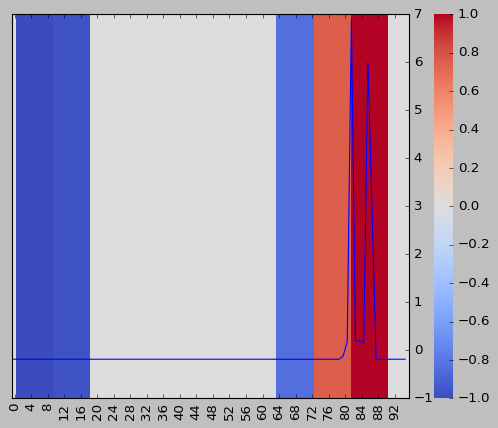

In [13]:
leftist.plot(np.array([explained_instance]), np.array([explanations[1]]))